In [1]:
#import dependencies
import os
import pandas as pd


In [2]:
# read in csv file from data folder
df = pd.read_csv("data/VCardTransactions-NoName.csv", sep=",")
df

,tTransID,FullName,CardNumber,LotNumber,EffectiveGroupName,EntranceTime,ExitTime,Sort_Time,BusinessHours,NWHours,UseMoreThan3Hours,HourExceed3Hours,NoEntry,noexit,Consecutive,Overnight
0,22840709,NaN,12777,13,NaN,2022-07-11 12:29:09.493,NaN,2022-07-11 12:29:09.493,NaN,NaN,NaN,NaN,0,1,0,0
1,22840716,NaN,47951,40,NaN,2022-07-11 12:29:09.367,NaN,2022-07-11 12:29:09.367,NaN,NaN,NaN,NaN,0,1,0,0
2,22840719,NaN,58760,3,NaN,2022-07-11 12:29:04.227,NaN,2022-07-11 12:29:04.227,NaN,NaN,NaN,NaN,0,1,0,0
3,22840717,NaN,57369,20,NaN,2022-07-11 12:29:02.680,NaN,2022-07-11 12:29:02.680,NaN,NaN,NaN,NaN,0,1,0,0
4,22840710,NaN,13947,11,NaN,2022-07-11 12:28:53.320,NaN,2022-07-11 12:28:53.320,NaN,NaN,NaN,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354545,15996703,NaN,3520,10,NW (With Permit),2020-01-01 05:15:34.000,2020-01-01 14:43:32.000,2020-01-01 05:15:34.000,0.0,10.0,0.0,0.0,0,0,0,0
3354546,15996472,NaN,23817,80,NW ONLY,2020-01-01 04:40:59.000,2020-01-01 09:08:11.000,2020-01-01 04:40:59.000,0.0,5.0,0.0,0.0,0,0,0,0
3354547,15996574,NaN,23266,30,NW ONLY,2020-01-01 04:01:44.000,2020-01-01 12:28:42.000,2020-01-01 04:01:44.000,0.0,9.0,0.0,0.0,0,0,0,0
3354548,16024493,NaN,40873,80,NW ONLY,2020-01-01 03:55:40.000,NaN,2020-01-01 03:55:40.000,0.0,0.0,0.0,0.0,0,1,1,0


In [3]:
df['EntranceDate'] = pd.to_datetime(df['EntranceTime']).dt.date
df['EntranceTime'] = pd.to_datetime(df['EntranceTime']).dt.time
df['ExitDate'] = pd.to_datetime(df['ExitTime']).dt.date
df['ExitTime'] = pd.to_datetime(df['ExitTime']).dt.time
df['SortDate'] = pd.to_datetime(df['Sort_Time']).dt.date
df['SortTime'] = pd.to_datetime(df['Sort_Time']).dt.time

In [4]:
col_titles = ['tTransID', 'CardNumber', 'LotNumber', 'EffectiveGroupName','EntranceDate', 'EntranceTime',
       'ExitDate', 'Exit Time','SortDate','SortTime', 'BusinessHours', 'NWHours',
       'UseMoreThan3Hours', 'HourExceed3Hours', 'NoEntry', 'noexit',
       'Consecutive', 'Overnight']
df = df.reindex(columns=col_titles)
df

,tTransID,CardNumber,LotNumber,EffectiveGroupName,EntranceDate,EntranceTime,ExitDate,Exit Time,SortDate,SortTime,BusinessHours,NWHours,UseMoreThan3Hours,HourExceed3Hours,NoEntry,noexit,Consecutive,Overnight
0,22840709,12777,13,NaN,2022-07-11,12:29:09.493000,NaT,NaN,2022-07-11,12:29:09.493000,NaN,NaN,NaN,NaN,0,1,0,0
1,22840716,47951,40,NaN,2022-07-11,12:29:09.367000,NaT,NaN,2022-07-11,12:29:09.367000,NaN,NaN,NaN,NaN,0,1,0,0
2,22840719,58760,3,NaN,2022-07-11,12:29:04.227000,NaT,NaN,2022-07-11,12:29:04.227000,NaN,NaN,NaN,NaN,0,1,0,0
3,22840717,57369,20,NaN,2022-07-11,12:29:02.680000,NaT,NaN,2022-07-11,12:29:02.680000,NaN,NaN,NaN,NaN,0,1,0,0
4,22840710,13947,11,NaN,2022-07-11,12:28:53.320000,NaT,NaN,2022-07-11,12:28:53.320000,NaN,NaN,NaN,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354545,15996703,3520,10,NW (With Permit),2020-01-01,05:15:34,2020-01-01,NaN,2020-01-01,05:15:34,0.0,10.0,0.0,0.0,0,0,0,0
3354546,15996472,23817,80,NW ONLY,2020-01-01,04:40:59,2020-01-01,NaN,2020-01-01,04:40:59,0.0,5.0,0.0,0.0,0,0,0,0
3354547,15996574,23266,30,NW ONLY,2020-01-01,04:01:44,2020-01-01,NaN,2020-01-01,04:01:44,0.0,9.0,0.0,0.0,0,0,0,0
3354548,16024493,40873,80,NW ONLY,2020-01-01,03:55:40,NaT,NaN,2020-01-01,03:55:40,0.0,0.0,0.0,0.0,0,1,1,0


In [8]:
# get value counts for no entry or exit 
no_exit_cnt = df.noexit.value_counts()
no_entry_cnt = df.NoEntry.value_counts()


<AxesSubplot:title={'center':'Normal Entry vs. No Entry'}, ylabel='NoEntry'>

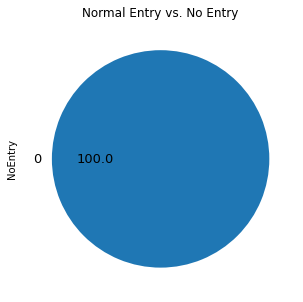

In [9]:
no_entry_cnt.plot(kind="pie", title="Normal Entry vs. No Entry", figsize=(5,5), autopct='%.1f', fontsize=13)


<AxesSubplot:title={'center':'Normal Exit vs. No Exit'}, ylabel='noexit'>

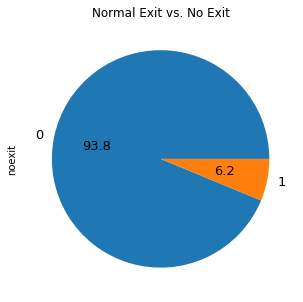

In [10]:
no_exit_cnt.plot(kind="pie", title="Normal Exit vs. No Exit", figsize=(5,5), autopct='%.1f', fontsize=13)

With looking at the two pie chart options for no entry counts, and no exit counts - It looks like entry times are at a 100% success rate of recording, while we are seeing a 6.2% fail rate on exit times. 